In [1]:
import numpy as np
import pandas as pd

In [5]:
#Load the dataset
data_path = 'nvidia.csv'
nvidia_data = pd.read_csv(data_path)
nvidia_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000


In [6]:
nvidia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6393 non-null   object 
 1   Open       6393 non-null   float64
 2   High       6393 non-null   float64
 3   Low        6393 non-null   float64
 4   Close      6393 non-null   float64
 5   Adj Close  6393 non-null   float64
 6   Volume     6393 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 349.7+ KB


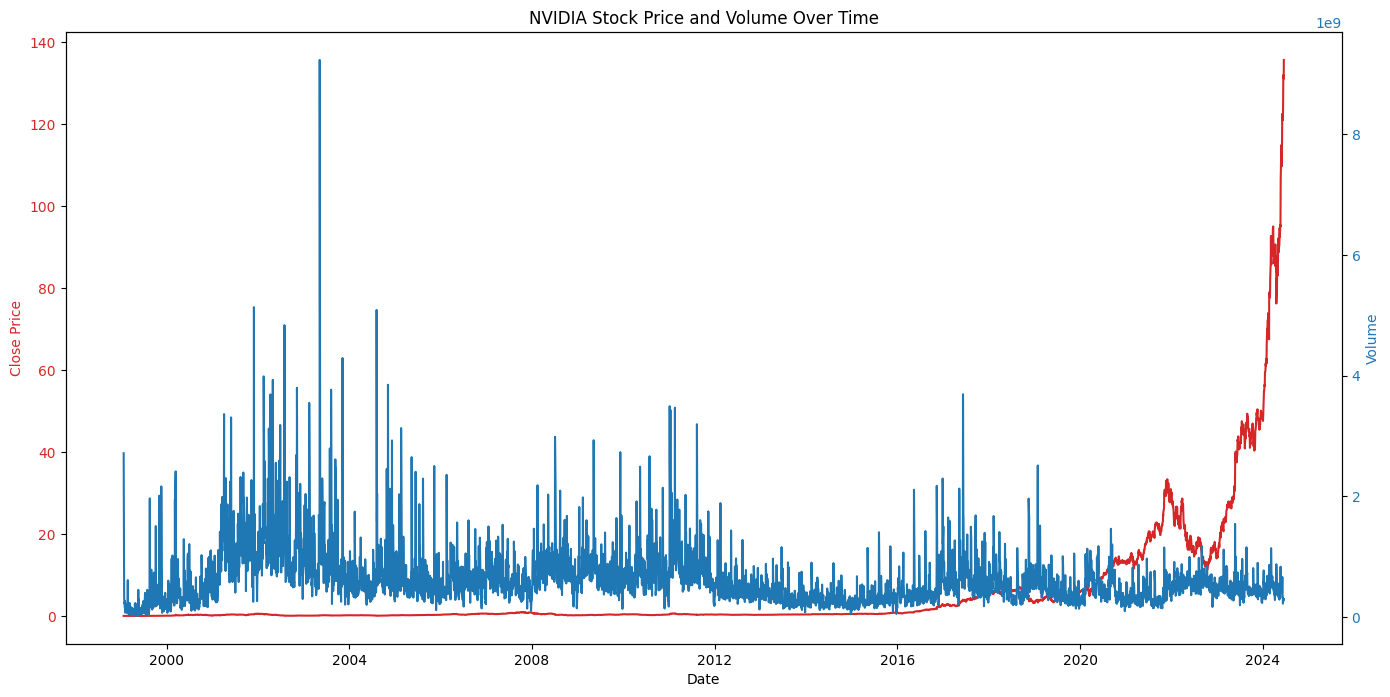

In [7]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime type for better plotting
nvidia_data['Date'] = pd.to_datetime(nvidia_data['Date'])

# Plotting the closing price and trading volume
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(nvidia_data['Date'], nvidia_data['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Volume', color=color)
ax2.plot(nvidia_data['Date'], nvidia_data['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # to ensure tight layout so labels don't cut off
plt.title('NVIDIA Stock Price and Volume Over Time')
plt.show()


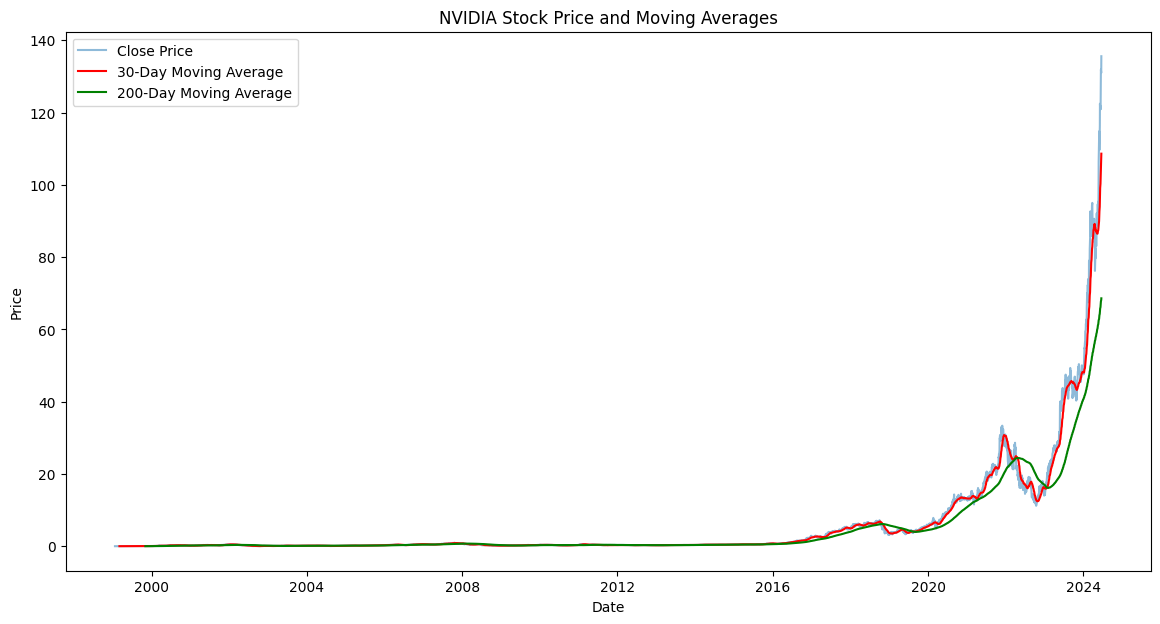

In [8]:
# Calculate moving averages for the closing prices
nvidia_data['30-Day MA'] = nvidia_data['Close'].rolling(window=30).mean()
nvidia_data['200-Day MA'] = nvidia_data['Close'].rolling(window=200).mean()

# Plotting the closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(nvidia_data['Date'], nvidia_data['Close'], label='Close Price', alpha=0.5)
plt.plot(nvidia_data['Date'], nvidia_data['30-Day MA'], label='30-Day Moving Average', color='red')
plt.plot(nvidia_data['Date'], nvidia_data['200-Day MA'], label='200-Day Moving Average', color='green')

plt.title('NVIDIA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the Data
# Adding a numeric 'time' column to represent the date numerically
nvidia_data['Time'] = (nvidia_data['Date'] - nvidia_data['Date'].min()) / pd.Timedelta(days=1)

# Splitting the Data
X = nvidia_data[['Time']]  # Features
y = nvidia_data['Close']   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Outputs
model.coef_, model.intercept_, rmse

(array([0.00302907]), -8.35256297135744, 10.987597122595343)

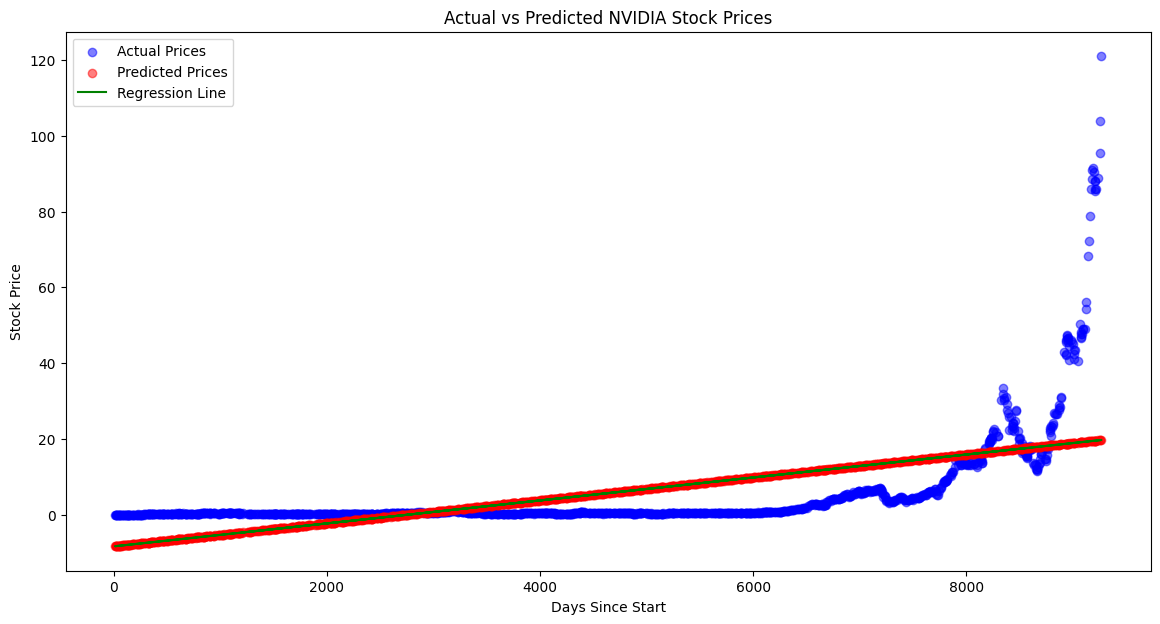

In [10]:
# Plotting the actual vs predicted values and the regression line
plt.figure(figsize=(14, 7))
plt.scatter(X_test['Time'], y_test, color='blue', label='Actual Prices', alpha=0.5)
plt.scatter(X_test['Time'], y_pred, color='red', label='Predicted Prices', alpha=0.5)
plt.plot(X_test['Time'], y_pred, color='green', label='Regression Line')

plt.title('Actual vs Predicted NVIDIA Stock Prices')
plt.xlabel('Days Since Start')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [12]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ----------------------

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\http\client.py", line 479, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "c:\Program Files\Python312\Lib\socket.py", line 708, in readinto
    return self._sock.recv_into(b)


C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


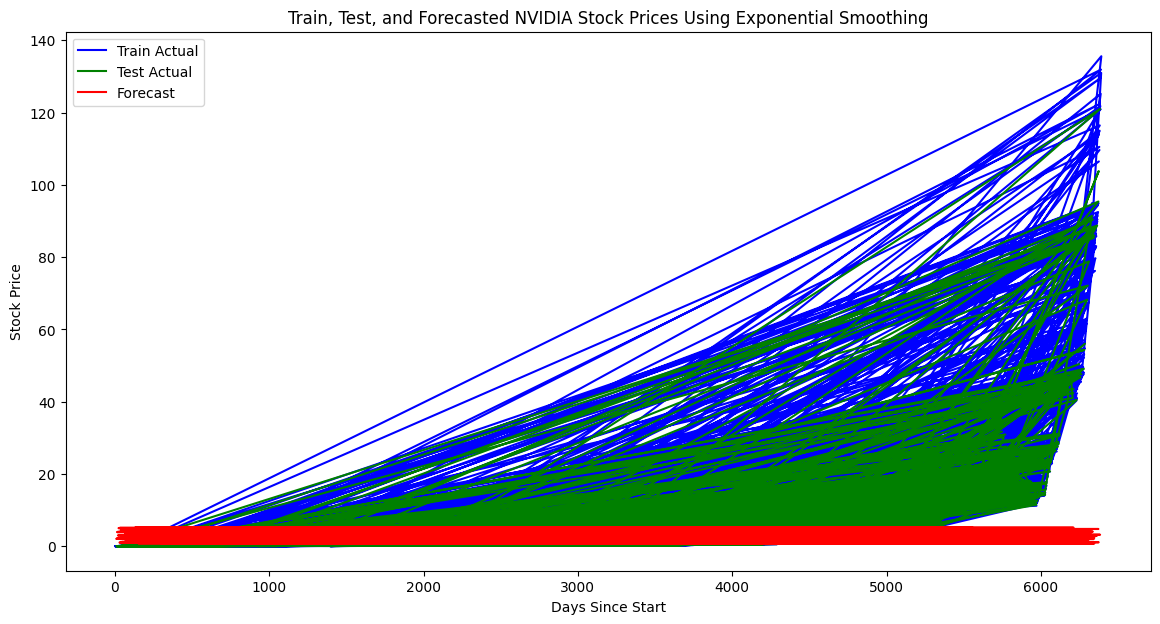

C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


13.652404712166769

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Setting up the model with both trend and seasonal components as 'additive' since stock prices tend to be non-stationary
model = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)

# Fitting the model
fitted_model = model.fit()

# Predicting on the test set
y_hat = fitted_model.forecast(len(y_test))

# Plotting the fitted values and the forecasts
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label='Train Actual', color='blue')
plt.plot(y_test.index, y_test, label='Test Actual', color='green')
plt.plot(y_test.index, y_hat, label='Forecast', color='red')
plt.title('Train, Test, and Forecasted NVIDIA Stock Prices Using Exponential Smoothing')
plt.xlabel('Days Since Start')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate RMSE for the forecast
forecast_rmse = mean_squared_error(y_test, y_hat, squared=False)
forecast_rmse

In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check stationarity
adf_test = adfuller(nvidia_data['Close'])

# Output the results of the ADF test
adf_test_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
}

adf_test_result


{'ADF Statistic': 8.474346888258257,
 'p-value': 1.0,
 'Critical Values': {'1%': -3.43137893081211,
  '5%': -2.861994697534316,
  '10%': -2.5670120323695502}}

In [18]:
# Differencing the data
nvidia_data['Diff_1'] = nvidia_data['Close'].diff()

# Perform the ADF test again on the differenced data
adf_test_diff = adfuller(nvidia_data['Diff_1'].dropna())

# Output the results of the ADF test on the differenced data
adf_test_diff_result = {
    "ADF Statistic": adf_test_diff[0],
    "p-value": adf_test_diff[1],
    "Critical Values": adf_test_diff[4],
}

adf_test_diff_result


{'ADF Statistic': -5.977280929840983,
 'p-value': 1.874433471541862e-07,
 'Critical Values': {'1%': -3.431379092735461,
  '5%': -2.861994769077906,
  '10%': -2.567012070453846}}

In [20]:
from itertools import product

# Correct grid search setup using itertools.product
pdq = list(product(p, [1], q))  # d is fixed to 1 as we've already differenced the data once

best_aic = np.inf
best_pdq = None
best_model = None

for param in pdq:
    try:
        temp_model = ARIMA(nvidia_data['Close'], order=param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except Exception as e:
        print('Failed to fit ARIMA with {}: {}'.format(param, e))
        continue

best_aic, best_pdq, best_model.summary()

C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-

(8484.072312500077,
 (2, 1, 2),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:                  Close   No. Observations:                 6393
 Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4237.036
 Date:                Wed, 19 Jun 2024   AIC                           8484.072
 Time:                        12:49:51   BIC                           8517.886
 Sample:                             0   HQIC                          8495.777
                                - 6393                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.0403      0.003     15.799      0.000       0.035       0.045
 ar.L2          0.9544      0.003    3

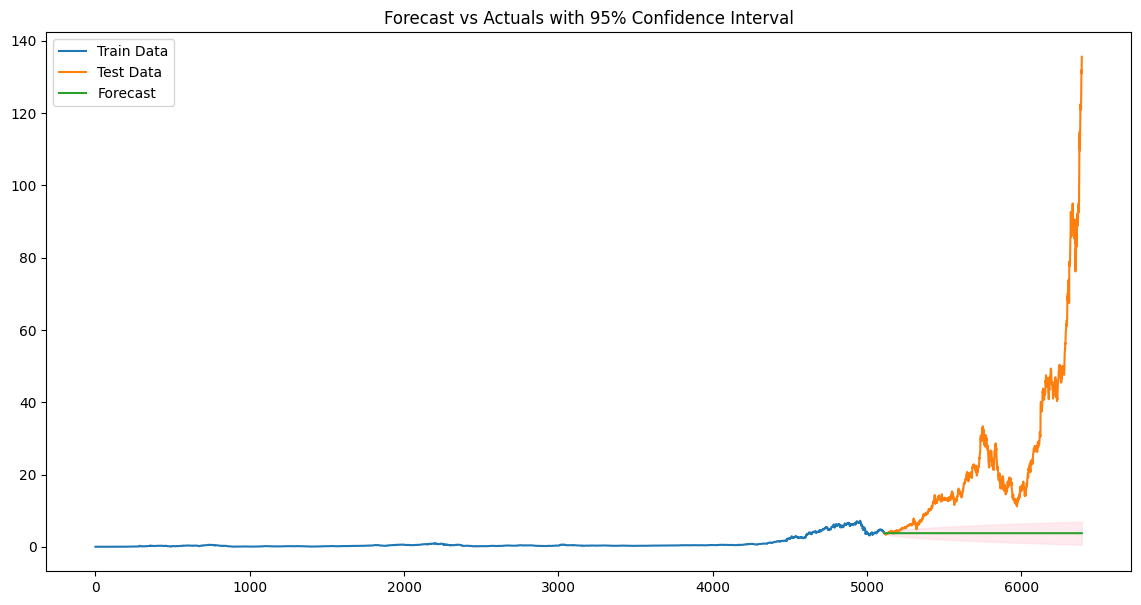

C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


31.29698261062124

In [23]:
# Split data into train and test for evaluation
train_size = int(len(nvidia_data) * 0.8)
test_size = len(nvidia_data) - train_size
train, test = nvidia_data['Close'][0:train_size], nvidia_data['Close'][train_size:len(nvidia_data)]

# Correcting the forecast unpacking
forecast_result = model_fit.get_forecast(steps=test_size)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Re-plotting the actual vs predicted values with correct confidence interval handling
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast vs Actuals with 95% Confidence Interval')
plt.legend()
plt.show()

# Calculate and print the RMSE for the forecast
forecast_rmse_corrected = mean_squared_error(test, forecast, squared=False)
forecast_rmse_corrected



## LSTM

In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Data preparation for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(nvidia_data['Close'].values.reshape(-1, 1))

# Function to create sequences for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   # Input for the LSTM
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Output prediction
    return np.array(dataX), np.array(dataY)

# Using 100 days of past data to predict the next day
time_step = 100
X, y = create_dataset(scaled_data, time_step)

# Reshaping input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting data into train and test sets
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Output model summary
model.summary()


C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load data
data = pd.read_csv('nvidia.csv')
stock_prices = data['Close'].values  

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices.reshape(-1, 1))

# Reshape data for LSTM [samples, time steps, features]
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 100
X, Y = create_dataset(scaled_data, look_back)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32)

# Predict and evaluate the model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # Inverse scaling

# RMSE calculation
rmse = np.sqrt(np.mean(np.square(predicted_stock_price - scaler.inverse_transform(Y_test.reshape(-1, 1)))))
print("RMSE: ", rmse)

Epoch 1/100


C:\Users\Noel\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 5.2748e-05
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 8.9811e-07
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 1.2656e-07
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 9.3727e-08
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 1.3494e-07
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 8.6778e-08
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 1.3251e-07
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 1.1418e-07
Epoch 9/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 1.2459e-07
Epoch 10/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 7.6987e-08
Epoch 11/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.1480e-07
Epoch 12/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 1.7266e-07
Epoch 13/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 1.1217e-07
Epoch 14/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - lo

In [31]:
from keras.layers import Input

# Build the LSTM model with explicit input layer
model = Sequential()
model.add(Input(shape=(100, 1)))  # Define the input shape explicitly
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [33]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4215, 100, 1)
y_train shape: (5033,)
X_test shape: (2077, 100, 1)
y_test shape: (1259,)


In [34]:
def create_dataset(dataset, look_back=100):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]  # Input sequence from current index to look_back days
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])  # Output is the next day after the sequence
    return np.array(dataX), np.array(dataY)

# Prepare data
look_back = 100  # Number of previous days the model looks at
X, y = create_dataset(scaled_data, look_back)
X = X.reshape(X.shape[0], look_back, 1)  # Reshape for LSTM

# Splitting the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [35]:
validation_data = (X_test, y_test)  # Set aside part of your training data for validation

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=validation_data)


Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 4.8382e-05 - val_loss: 8.8058e-04
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 9.6999e-07 - val_loss: 0.0012
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 1.1215e-06 - val_loss: 7.7578e-04
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 8.8111e-07 - val_loss: 3.9464e-04
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.1075e-07 - val_loss: 6.5352e-04
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.9760e-07 - val_loss: 7.8355e-04
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 8.4766e-07 - val_loss: 3.9700e-04
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 1.1301e-06 - val_loss: 4.9972e-04
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 8.1172e-07 - val_loss: 3.0509e-04
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 7.1801e-07 - val_loss: 4.6356e-04
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6

In [36]:
from keras.layers import Dropout

model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [37]:
# Example of calculating a simple moving average and adding it to your features
data['SMA'] = data['Close'].rolling(window=50).mean()
features = data[['Close', 'SMA']].values  # Assuming 'Close' and 'SMA' are your chosen features
scaled_features = scaler.fit_transform(features)

In [39]:
# Assuming your scaler was fitted to both 'Close' and 'SMA' initially:
scaler = MinMaxScaler(feature_range=(0, 1))
features = data[['Close']]  # Only use Close if that's all you used for predictions
scaled_features = scaler.fit_transform(features)

# When inversing, ensure the prediction output matches the scaler's fit shape
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))  # Reshape if necessary

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


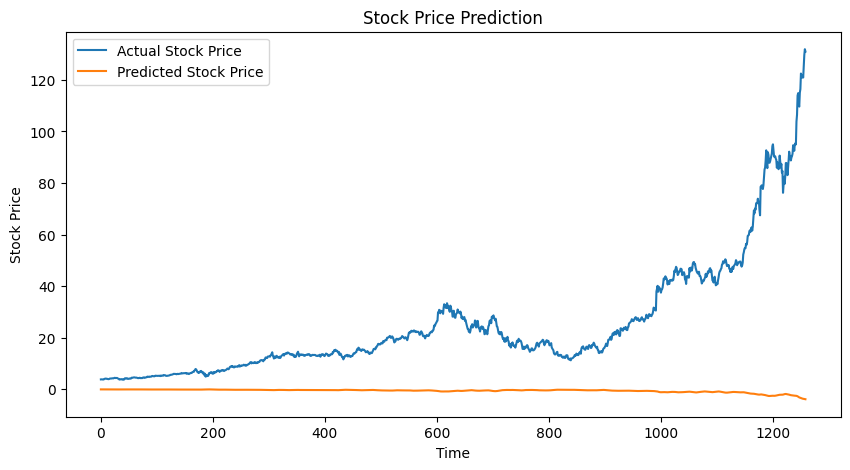

In [40]:
actual_stock_prices = scaler.inverse_transform([y_test]).flatten()  # Flatten if y_test is scaled similarly

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_prices, label='Actual Stock Price')
plt.plot(predicted_stock_price.flatten(), label='Predicted Stock Price')  # Flatten to match dimensions
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Input

# Load your data
data = pd.read_csv('nvidia.csv')
stock_prices = data['Close'].values

In [42]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_prices.reshape(-1, 1))

In [43]:
# Function to create dataset
def create_dataset(dataset, look_back=100):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
# Prepare the data
look_back = 100
X, y = create_dataset(scaled_data, look_back)
X = X.reshape(X.shape[0], look_back, 1)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [45]:
# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5034, 100, 1)
y_train shape: (5034,)
X_test shape: (1259, 100, 1)
y_test shape: (1259,)


In [46]:
# Build the LSTM model with explicit input layer
model = Sequential()
model.add(Input(shape=(100, 1)))  # Define the input shape explicitly
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:

# Train the model with validation data
validation_data = (X_test, y_test)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=validation_data)

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 6.3485e-05 - val_loss: 0.0014
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.7677e-06 - val_loss: 0.0020
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.8522e-06 - val_loss: 0.0014
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.3254e-06 - val_loss: 0.0016
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.1398e-06 - val_loss: 5.5213e-04
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 3.2994e-06 - val_loss: 0.0012
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.7604e-06 - val_loss: 6.9099e-04
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.9674e-06 - val_loss: 3.5713e-04
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 2.6109e-06 - val_loss: 3.8016e-04
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 1.9140e-06 - val_loss: 7.3012e-04
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - lo

In [48]:
# Predict and evaluate the model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse scaling for the actual stock prices
actual_stock_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


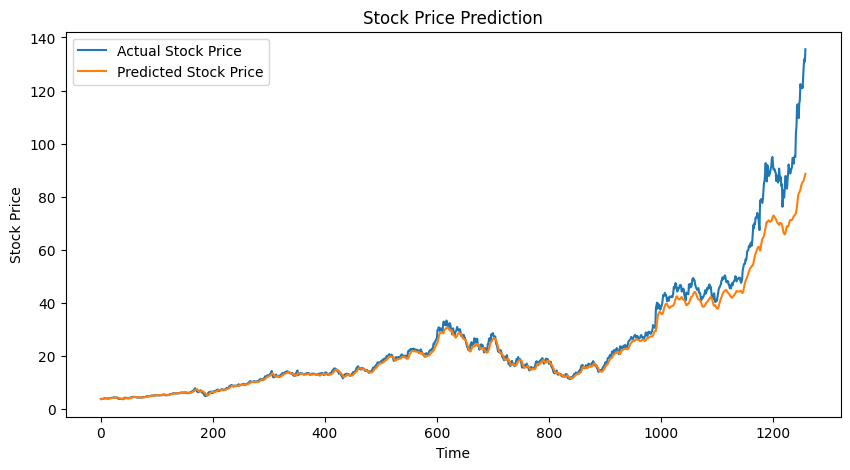

RMSE:  6.552754064711587


In [49]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_prices, label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(actual_stock_prices - predicted_stock_price)))
print("RMSE: ", rmse)

In [51]:
# Load your data
data = pd.read_csv('nvidia.csv')
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)  # Drop NaN values

In [52]:
# Use both Close and SMA as features
features = data[['Close', 'SMA_50']].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

In [53]:
def create_dataset_multifeature(dataset, look_back=100):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back)])
        dataY.append(dataset[i + look_back, 0])  # Predicting the Close price
    return np.array(dataX), np.array(dataY)

# Prepare the data
look_back = 100
X, y = create_dataset_multifeature(scaled_features, look_back)


In [54]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4995, 100, 2)
y_train shape: (4995,)
X_test shape: (1249, 100, 2)
y_test shape: (1249,)


In [55]:
# Build the LSTM model with explicit input layer
model = Sequential()
model.add(Input(shape=(look_back, 2)))  # Adjust for 2 features
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data
validation_data = (X_test, y_test)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=validation_data)


Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 3.7859e-05 - val_loss: 0.0012
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 4.0817e-06 - val_loss: 6.1193e-04
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 3.6457e-06 - val_loss: 0.0018
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 6.1349e-06 - val_loss: 5.5181e-04
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 2.7789e-06 - val_loss: 0.0011
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.2881e-06 - val_loss: 5.1715e-04
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 3.6096e-06 - val_loss: 0.0013
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 3.4060e-06 - val_loss: 0.0012
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 2.8557e-06 - val_loss: 5.6170e-04
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 3.5402e-06 - val_loss: 4.3024e-04
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - lo

In [56]:
# Predict and evaluate the model
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(np.concatenate([predicted_stock_price, np.zeros((predicted_stock_price.shape[0], 1))], axis=1))[:, 0]

# Inverse scaling for the actual stock prices
actual_stock_prices = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 1))], axis=1))[:, 0]


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


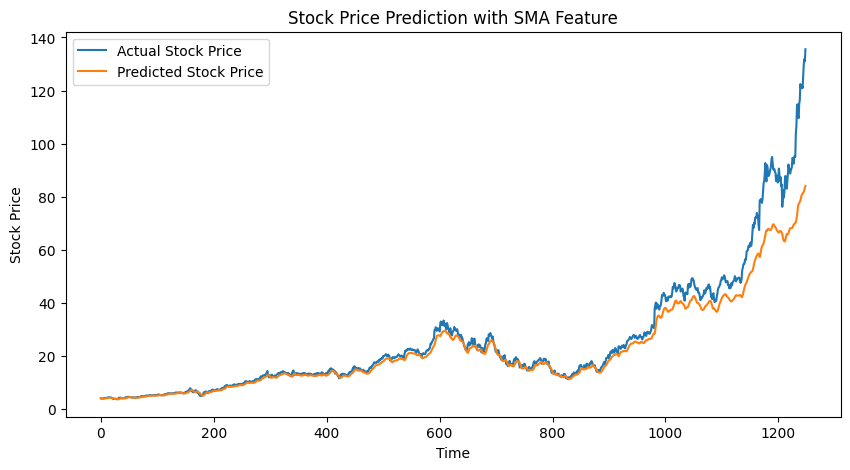

RMSE:  7.593728156298823


In [57]:

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_prices, label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.title('Stock Price Prediction with SMA Feature')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(actual_stock_prices - predicted_stock_price)))
print("RMSE: ", rmse)